In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banana/banana_quality.csv


In [2]:
# Imports
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/banana/banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [4]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [5]:
# Assuming 'df' is your DataFrame with 8000 rows
train, temp = train_test_split(df, test_size=0.3, random_state=42)  # 70% train, 30% temp
validation, test = train_test_split(temp, test_size=0.5, random_state=42)  # 50% of 30% → 15% ea

In [6]:
# validation the data sepration.
print(f"Train: {len(train)} rows")
print(f"Validation: {len(validation)} rows")
print(f"Test: {len(test)} rows")


Train: 5600 rows
Validation: 1200 rows
Test: 1200 rows


# Data Visualization


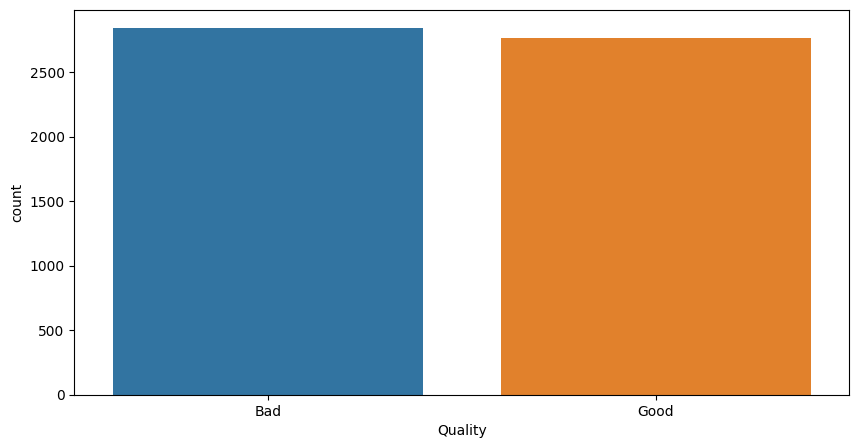

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Quality')
plt.show()

# Bar plot of target distribution per category


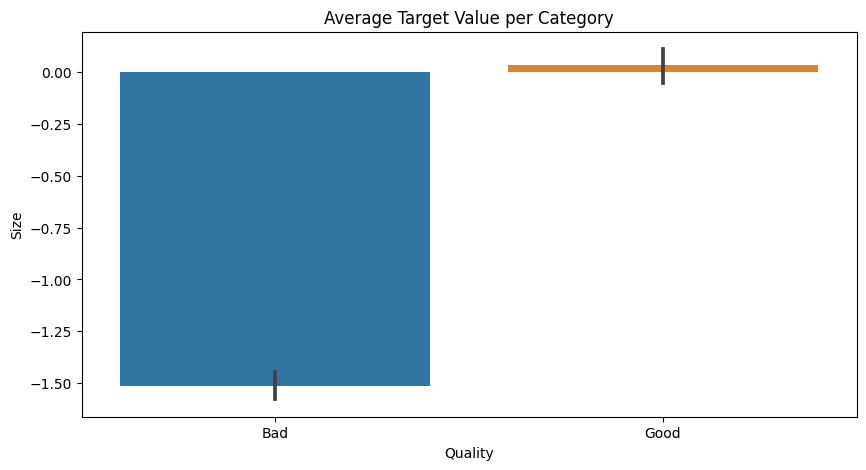

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='Quality', y='Size', estimator='mean')  # For binary target (0/1)
plt.title("Average Target Value per Category")
plt.show()

as you can see the size mean is a ( - ) value so we undrostood the data has been scaled.
from the comments it is written that the data has been scaled, with a mean of 0.
data_scaled = (data - data_mean) / data_std

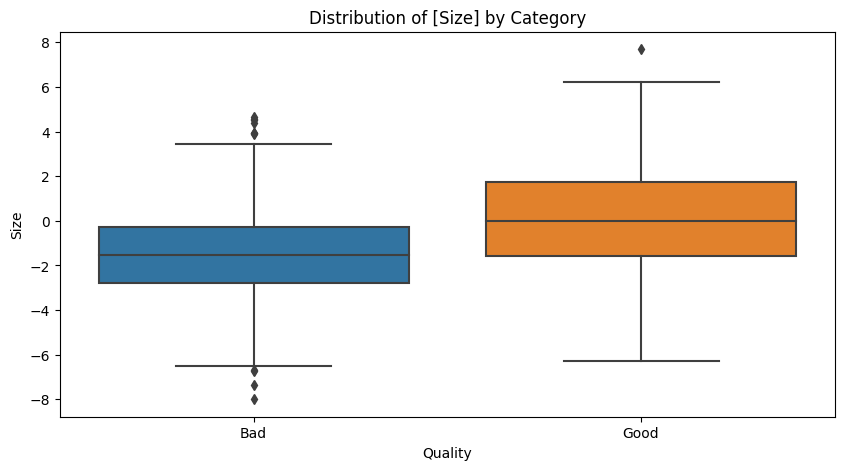

<Axes: xlabel='Quality', ylabel='Size'>

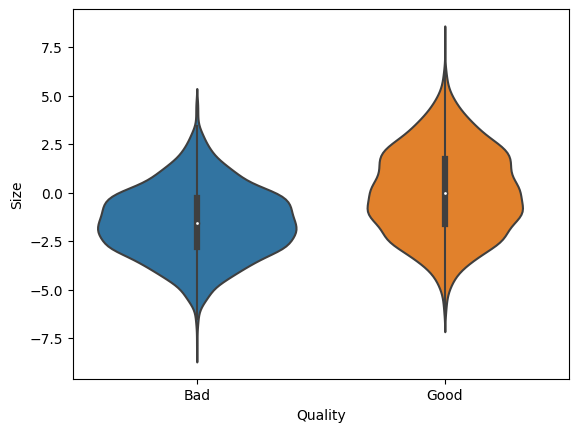

In [9]:
#2. Distribution of Numerical Features per Category
# Boxplot (for outliers and distribution spread)
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='Quality', y='Size')
plt.title("Distribution of [Size] by Category")
plt.show()

# Violin plot (shows density + distribution)
sns.violinplot(data=train, x='Quality', y='Size')

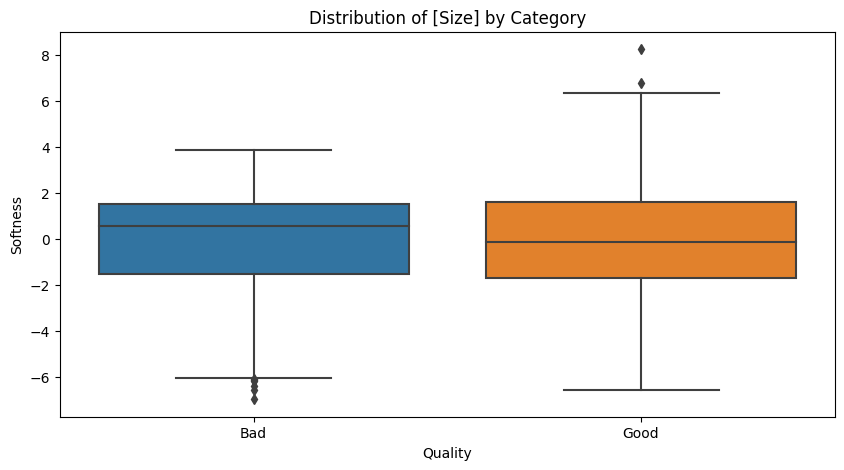

<Axes: xlabel='Quality', ylabel='Softness'>

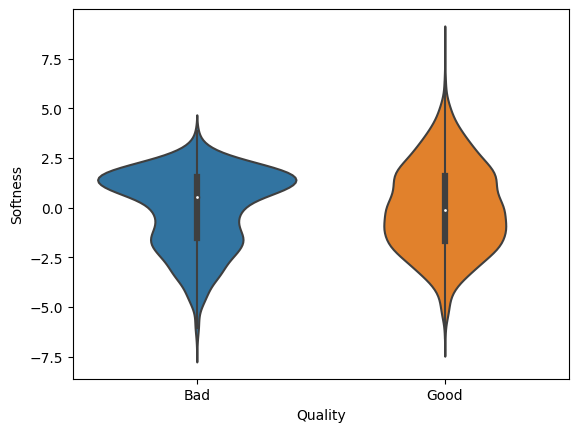

In [10]:
#2. Distribution of Numerical Features per Category
# Boxplot (for outliers and distribution spread)
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='Quality', y='Softness')
plt.title("Distribution of [Size] by Category")
plt.show()

# Violin plot (shows density + distribution)
sns.violinplot(data=train, x='Quality', y='Softness')

there is notting to undrestand from this plots except that we can make sure the data is distrubuted properly and is good for learning

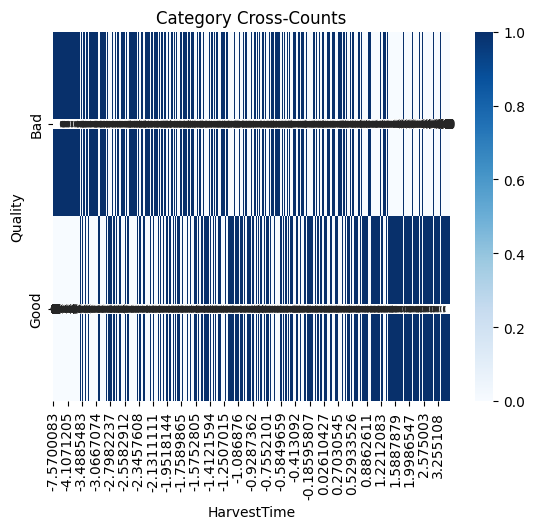

In [11]:
cross_tab = pd.crosstab(train['Quality'], train['HarvestTime'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Category Cross-Counts")
plt.show()

### This plot is inresting to me because it shows as we go to the left of x axis we can see the qulity increases significantly

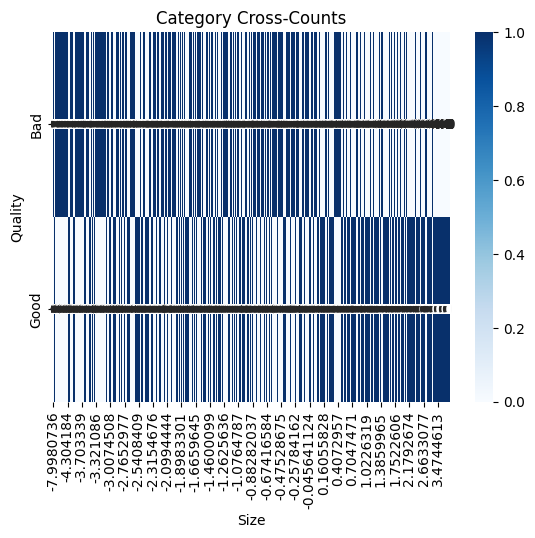

In [12]:
cross_tab = pd.crosstab(train['Quality'], train['Size'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Category Cross-Counts")
plt.show()

### you may think this also happens in this plot to based size but as you can see in the bad y axis we have still thick parts which shows size is not corrsepond well and has lower weight 

array([[<Axes: xlabel='Size', ylabel='Size'>,
        <Axes: xlabel='Weight', ylabel='Size'>,
        <Axes: xlabel='Sweetness', ylabel='Size'>,
        <Axes: xlabel='Softness', ylabel='Size'>,
        <Axes: xlabel='HarvestTime', ylabel='Size'>,
        <Axes: xlabel='Ripeness', ylabel='Size'>,
        <Axes: xlabel='Acidity', ylabel='Size'>],
       [<Axes: xlabel='Size', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Sweetness', ylabel='Weight'>,
        <Axes: xlabel='Softness', ylabel='Weight'>,
        <Axes: xlabel='HarvestTime', ylabel='Weight'>,
        <Axes: xlabel='Ripeness', ylabel='Weight'>,
        <Axes: xlabel='Acidity', ylabel='Weight'>],
       [<Axes: xlabel='Size', ylabel='Sweetness'>,
        <Axes: xlabel='Weight', ylabel='Sweetness'>,
        <Axes: xlabel='Sweetness', ylabel='Sweetness'>,
        <Axes: xlabel='Softness', ylabel='Sweetness'>,
        <Axes: xlabel='HarvestTime', ylabel='Sweetness'>,
        <Axes: xl

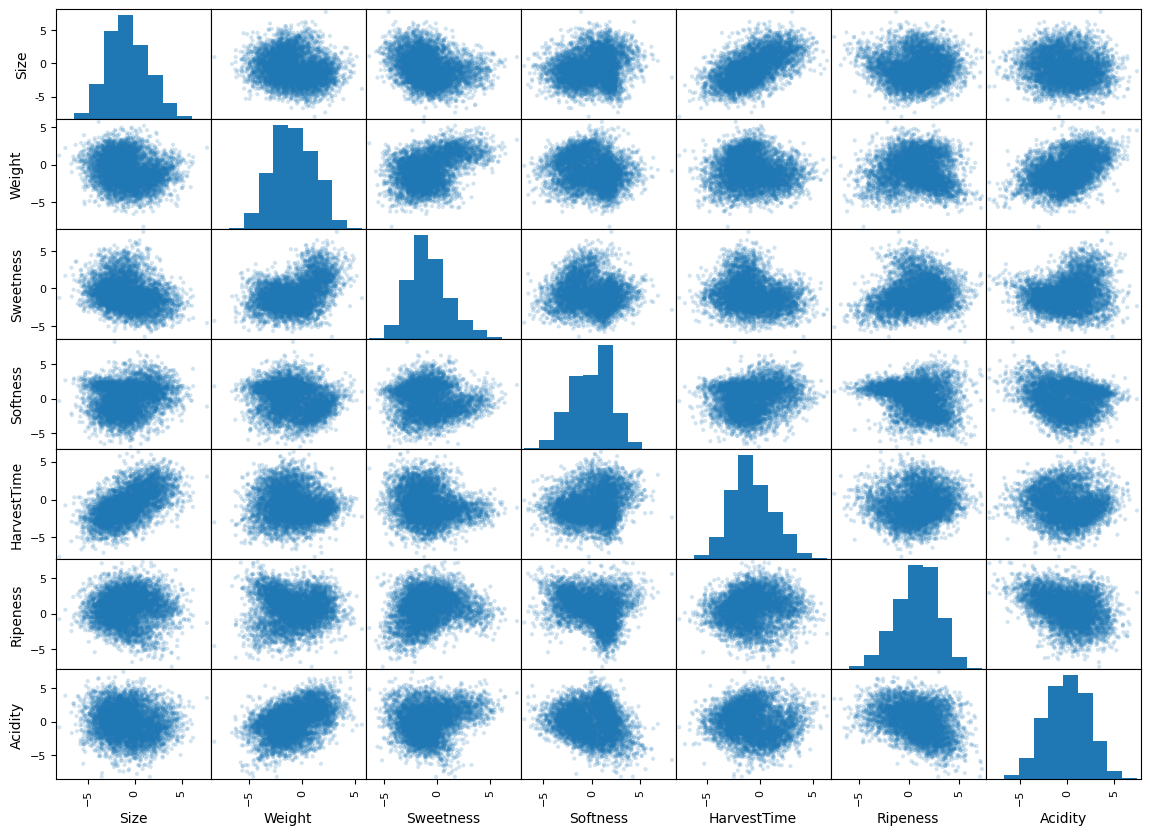

In [13]:
pd.plotting.scatter_matrix(train,figsize = (14,10) ,alpha = 0.2)

# another key thing which we did not noticed is that the data has been normalized between -5 and 5

## In this step we want to encod qulity column into numbers so we can use it for doing the learnign

In [14]:
# Define mapping
quality_map = {'Good': 1, 'Bad': 0}

# Apply mapping to the column
train['quality_encoded'] = train['Quality'].map(quality_map)

# Verify
print(train[['Quality', 'quality_encoded']].head())

     Quality  quality_encoded
6760     Bad                0
4623    Good                1
7841     Bad                0
3704     Bad                0
981     Good                1


#### Apply to Validation/Test Sets
Use the same mapping to avoid leakage:

In [15]:
# For Method 1 or 2:
validation['quality_encoded'] = validation['Quality'].map(quality_map)
test['quality_encoded'] = test['Quality'].map(quality_map)
# Verify
print(validation[['Quality', 'quality_encoded']].head())


     Quality  quality_encoded
2375     Bad                0
1971    Good                1
5562    Good                1
7259     Bad                0
7282     Bad                0


### droping the original column

In [16]:
train_final = train.drop('Quality', axis=1)  # Drop the original column
validation_final = validation.drop('Quality', axis=1)
test_final = test.drop('Quality', axis=1)

### check for miising values 

In [17]:
print(train.isnull().sum())

Size               0
Weight             0
Sweetness          0
Softness           0
HarvestTime        0
Ripeness           0
Acidity            0
Quality            0
quality_encoded    0
dtype: int64


In [18]:
print(train.describe())  # Ensure all features are in [-10, 10]

              Size       Weight    Sweetness     Softness  HarvestTime  \
count  5600.000000  5600.000000  5600.000000  5600.000000  5600.000000   
mean     -0.750776    -0.803846    -0.806844    -0.025666    -0.754835   
std       2.152228     1.985036     1.932917     2.070523     2.003469   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.318328    -2.256784    -2.124794    -1.607562    -2.133169   
50%      -0.894031    -0.904147    -1.034441     0.192975    -0.941390   
75%       0.668885     0.681361     0.243038     1.548086     0.501626   
max       7.688493     5.679692     7.539374     8.241555     6.293280   

          Ripeness      Acidity  quality_encoded  
count  5600.000000  5600.000000      5600.000000  
mean      0.786472    -0.019842         0.492857  
std       2.123287     2.286960         0.499994  
min      -7.423155    -8.226977         0.000000  
25%      -0.567564    -1.663541         0.000000  
50%       0.958179     0.04

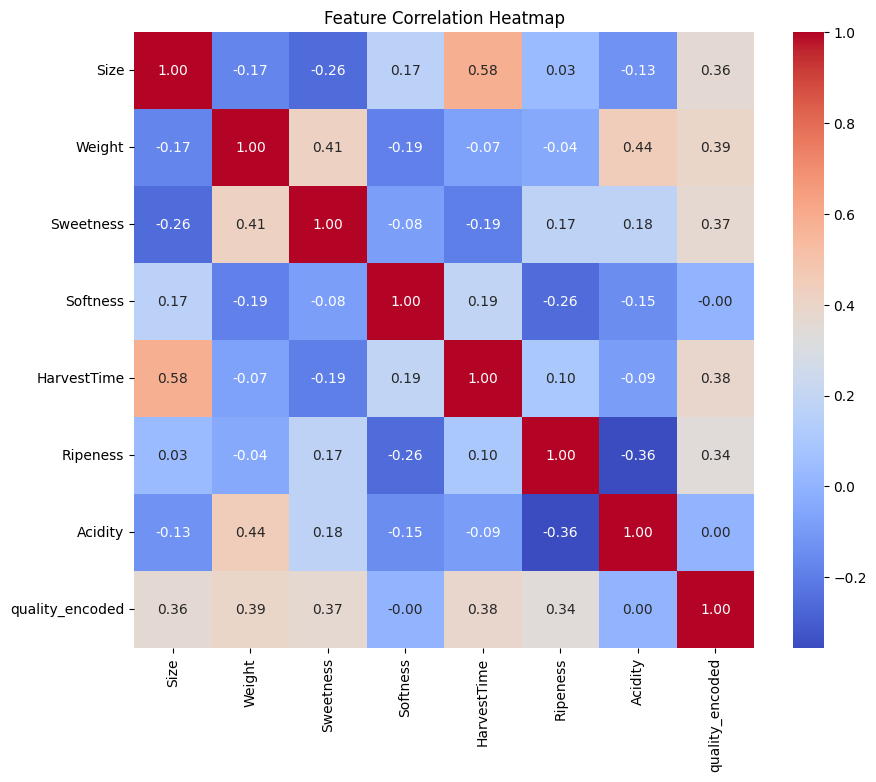

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train_final.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

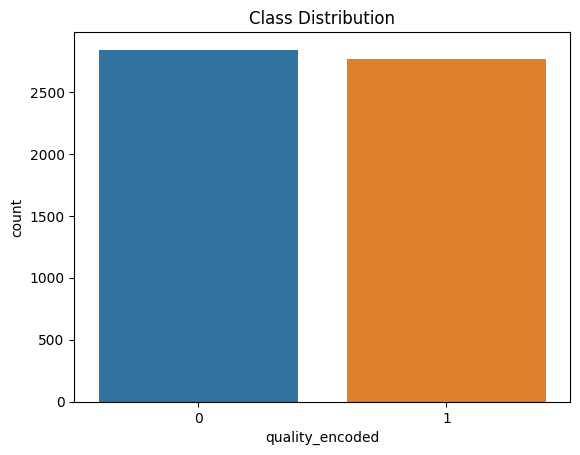

In [20]:
sns.countplot(x =train_final["quality_encoded"])
plt.title("Class Distribution")
plt.show()

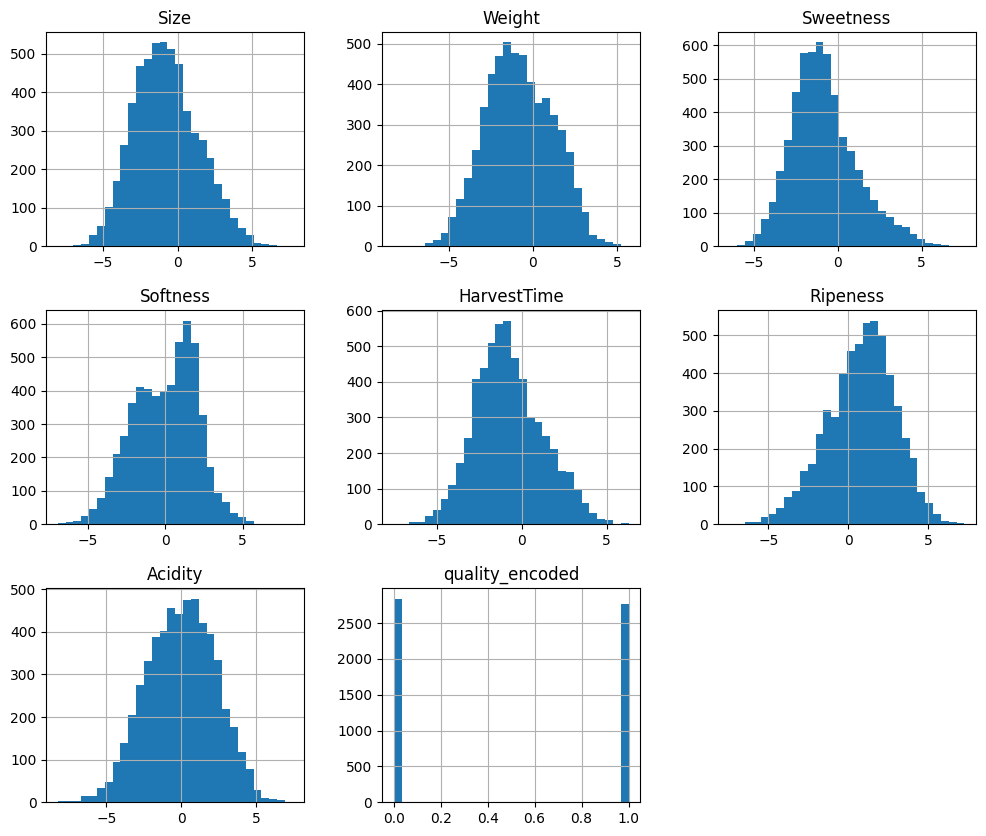

In [21]:
x = train_final
x.hist(figsize=(12, 10), bins=30)
plt.show()


#### Separating y(quality_encoded) column from data

In [22]:
y_train = train_final['quality_encoded']
X_train = train_final.drop('quality_encoded', axis=1)
X_val = validation_final.drop('quality_encoded', axis = 1)
y_val = validation_final['quality_encoded']

## Trying several different models on dataset to see which one workes the best

* Logistic Regression (baseline)

* Random Forest

* XGBoost

* Support Vector Machine (SVM)

* Neural Network (MLP) (if dataset is large) 

In [23]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [24]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    """Trains the model and evaluates accuracy & F1-score."""
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation set
    
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)  # For classification (binary/multi-class)

    return acc, f1

 #### 3. Train & Compare Different Models

In [25]:
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    acc, f1 = train_and_evaluate(model, X_train, y_train, X_val, y_val)
    results[name] = {"Accuracy": acc, "F1-score": f1}
    print(f"{name} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Display best model
best_model = max(results, key=lambda k: results[k]["F1-score"])
print(f"\n🏆 Best Model: {best_model} with F1-score: {results[best_model]['F1-score']:.4f}")


Logistic Regression -> Accuracy: 0.8742, F1-score: 0.8765
Random Forest -> Accuracy: 0.9767, F1-score: 0.9768
XGBoost -> Accuracy: 0.9775, F1-score: 0.9777
SVM -> Accuracy: 0.9858, F1-score: 0.9859
Neural Network (MLP) -> Accuracy: 0.9825, F1-score: 0.9826

🏆 Best Model: SVM with F1-score: 0.9859


In [26]:
X_test = test_final.drop('quality_encoded', axis = 1)
y_test = test_final['quality_encoded']

In [27]:
y_test_pred = models["SVM"].predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"🏆 Final Model Performance on Test Set -> Accuracy: {test_acc:.4f}, F1-score: {test_f1:.4f}")


🏆 Final Model Performance on Test Set -> Accuracy: 0.9758, F1-score: 0.9774


### 2. Analyze Feature Importance (Optional)
SVM does not provide feature importance directly, but you can use SHAP values to interpret which features impact the model most.

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(models["SVM"], scoring="f1", random_state=42)
perm.fit(X_val, y_val)

eli5.show_weights(perm, feature_names=X_val.columns.tolist())


Weight,Feature
0.1695 ± 0.0280,Weight
0.1467 ± 0.0207,Softness
0.1016 ± 0.0172,Acidity
0.0901 ± 0.0068,HarvestTime
0.0660 ± 0.0092,Ripeness
0.0516 ± 0.0106,Sweetness
0.0448 ± 0.0103,Size


In [30]:
import joblib

joblib.dump(models["SVM"], "banana_quality_svm.pkl")  # Save the model


['banana_quality_svm.pkl']